In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Movie.csv', header = 0)
# missing values 
df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)
# dummies 
df = pd.get_dummies(df, columns=['3D_available', 'Genre'], drop_first=True)
# split 
X = df.loc[:, df.columns!='Start_Tech_Oscar']
y = df['Start_Tech_Oscar']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## classification tree

In [4]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth=3)

In [5]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [6]:
y_test_pred = clftree.predict(X_test)
y_train_pred = clftree.predict(X_train)

In [7]:
y_test_pred 

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

predicting input data

In [30]:
x_single_row = X_test.iloc[[0]]
print(x_single_row)
clftree.predict(x_single_row)[0]

     Marketing expense  Production expense  Multiplex coverage     Budget  \
329            21.3448               61.48                0.54  35179.815   

     Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
329          90.7                7.32                 7.46            7.275   

     Producer_rating  Critic_rating  Trailer_views  Time_taken  \
329            7.515           8.62         483051      111.04   

     Twitter_hastags  Avg_age_actors  Num_multiplex  Collection  \
329          283.616              53            452       45200   

     3D_available_YES  Genre_Comedy  Genre_Drama  Genre_Thriller  
329                 0             1            0               0  


0

In [33]:
# Create a dictionary with the input values
input_dict = {'Marketing expense': 21.3448,
              'Production expense': 61.48,
              'Multiplex coverage': 0.54,
              'Budget': 35179.815,
              'Movie_length': 90.7,
              'Lead_ Actor_Rating': 7.32,
              'Lead_Actress_rating': 7.46,
              'Director_rating': 7.275,
              'Producer_rating': 7.515,
              'Critic_rating': 8.62,
              'Trailer_views': 483051,
              'Time_taken': 111.04,
              'Twitter_hastags': 283.616,
              'Avg_age_actors': 53,
              'Num_multiplex': 452,
              'Collection': 45423,
              '3D_available_YES': 0,
              'Genre_Comedy': 1,
              'Genre_Drama': 0,
              'Genre_Thriller': 0}

# Create a DataFrame from the dictionary
input_df = pd.DataFrame(input_dict, index=[0])

# Use the trained classifier to predict the target variable
clftree.predict(input_df)[0]

0

### performance

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
accuracy_score(y_test, y_test_pred)

0.5490196078431373

In [10]:
confusion_matrix(y_test, y_test_pred)

array([[39,  5],
       [41, 17]], dtype=int64)

In [11]:
confusion_matrix(y_train, y_train_pred)

array([[172,  14],
       [126,  92]], dtype=int64)

## plot trees

### 1.max depth given

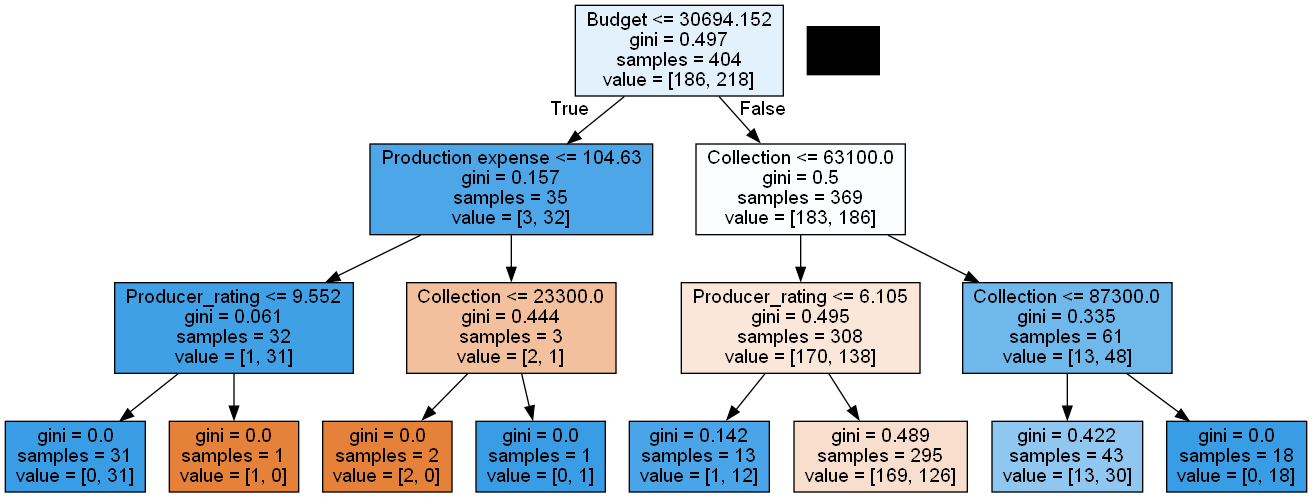

In [12]:
dot_data = tree.export_graphviz(clftree, out_file=None, feature_names=X_train.columns, filled=True)
from IPython.display import Image
import pydotplus
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

### 2.Min observations in internal node

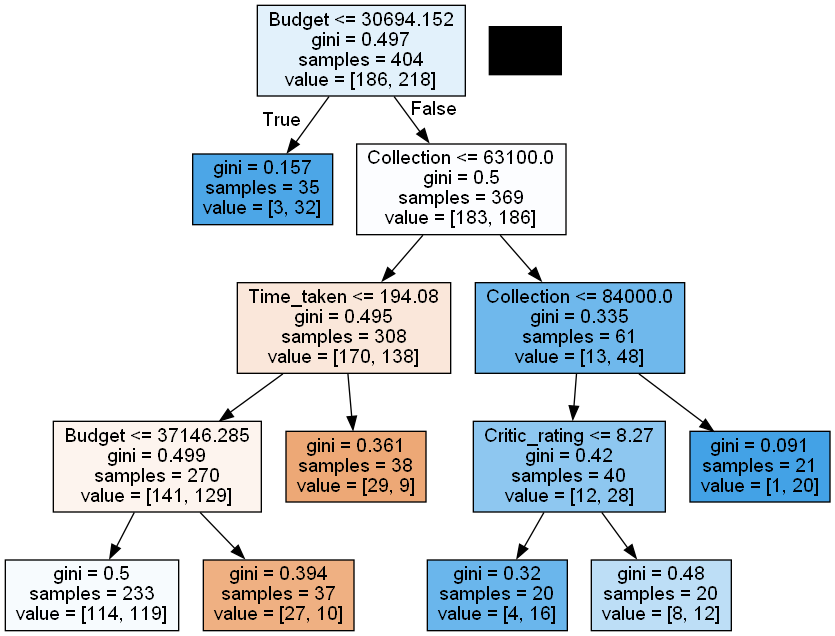

In [15]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None, feature_names=X_train.columns, filled=True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())